## Linear classification
### Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets as data
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load sample dataset

In [2]:

# Load sample data for regression: Breast cancer prediction is binary.
X, y = data.load_iris(return_X_y=True)

# Create train/test splits
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

### Instantiate algorithms

In [12]:
logistic_regression = linear_model.LogisticRegressionCV(cv=10, random_state=42, max_iter=1000)
ridge = linear_model.RidgeClassifierCV(cv=10)

sgd = linear_model.SGDClassifier()

### Fit algorithms

In [13]:
# Fit logistic regression
logistic_regression.fit(X_train, y_train)
y_pred_log_reg = logistic_regression.predict(X_test)

# Fit ridge classifier
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)



### Plot classification performance confusion matrix

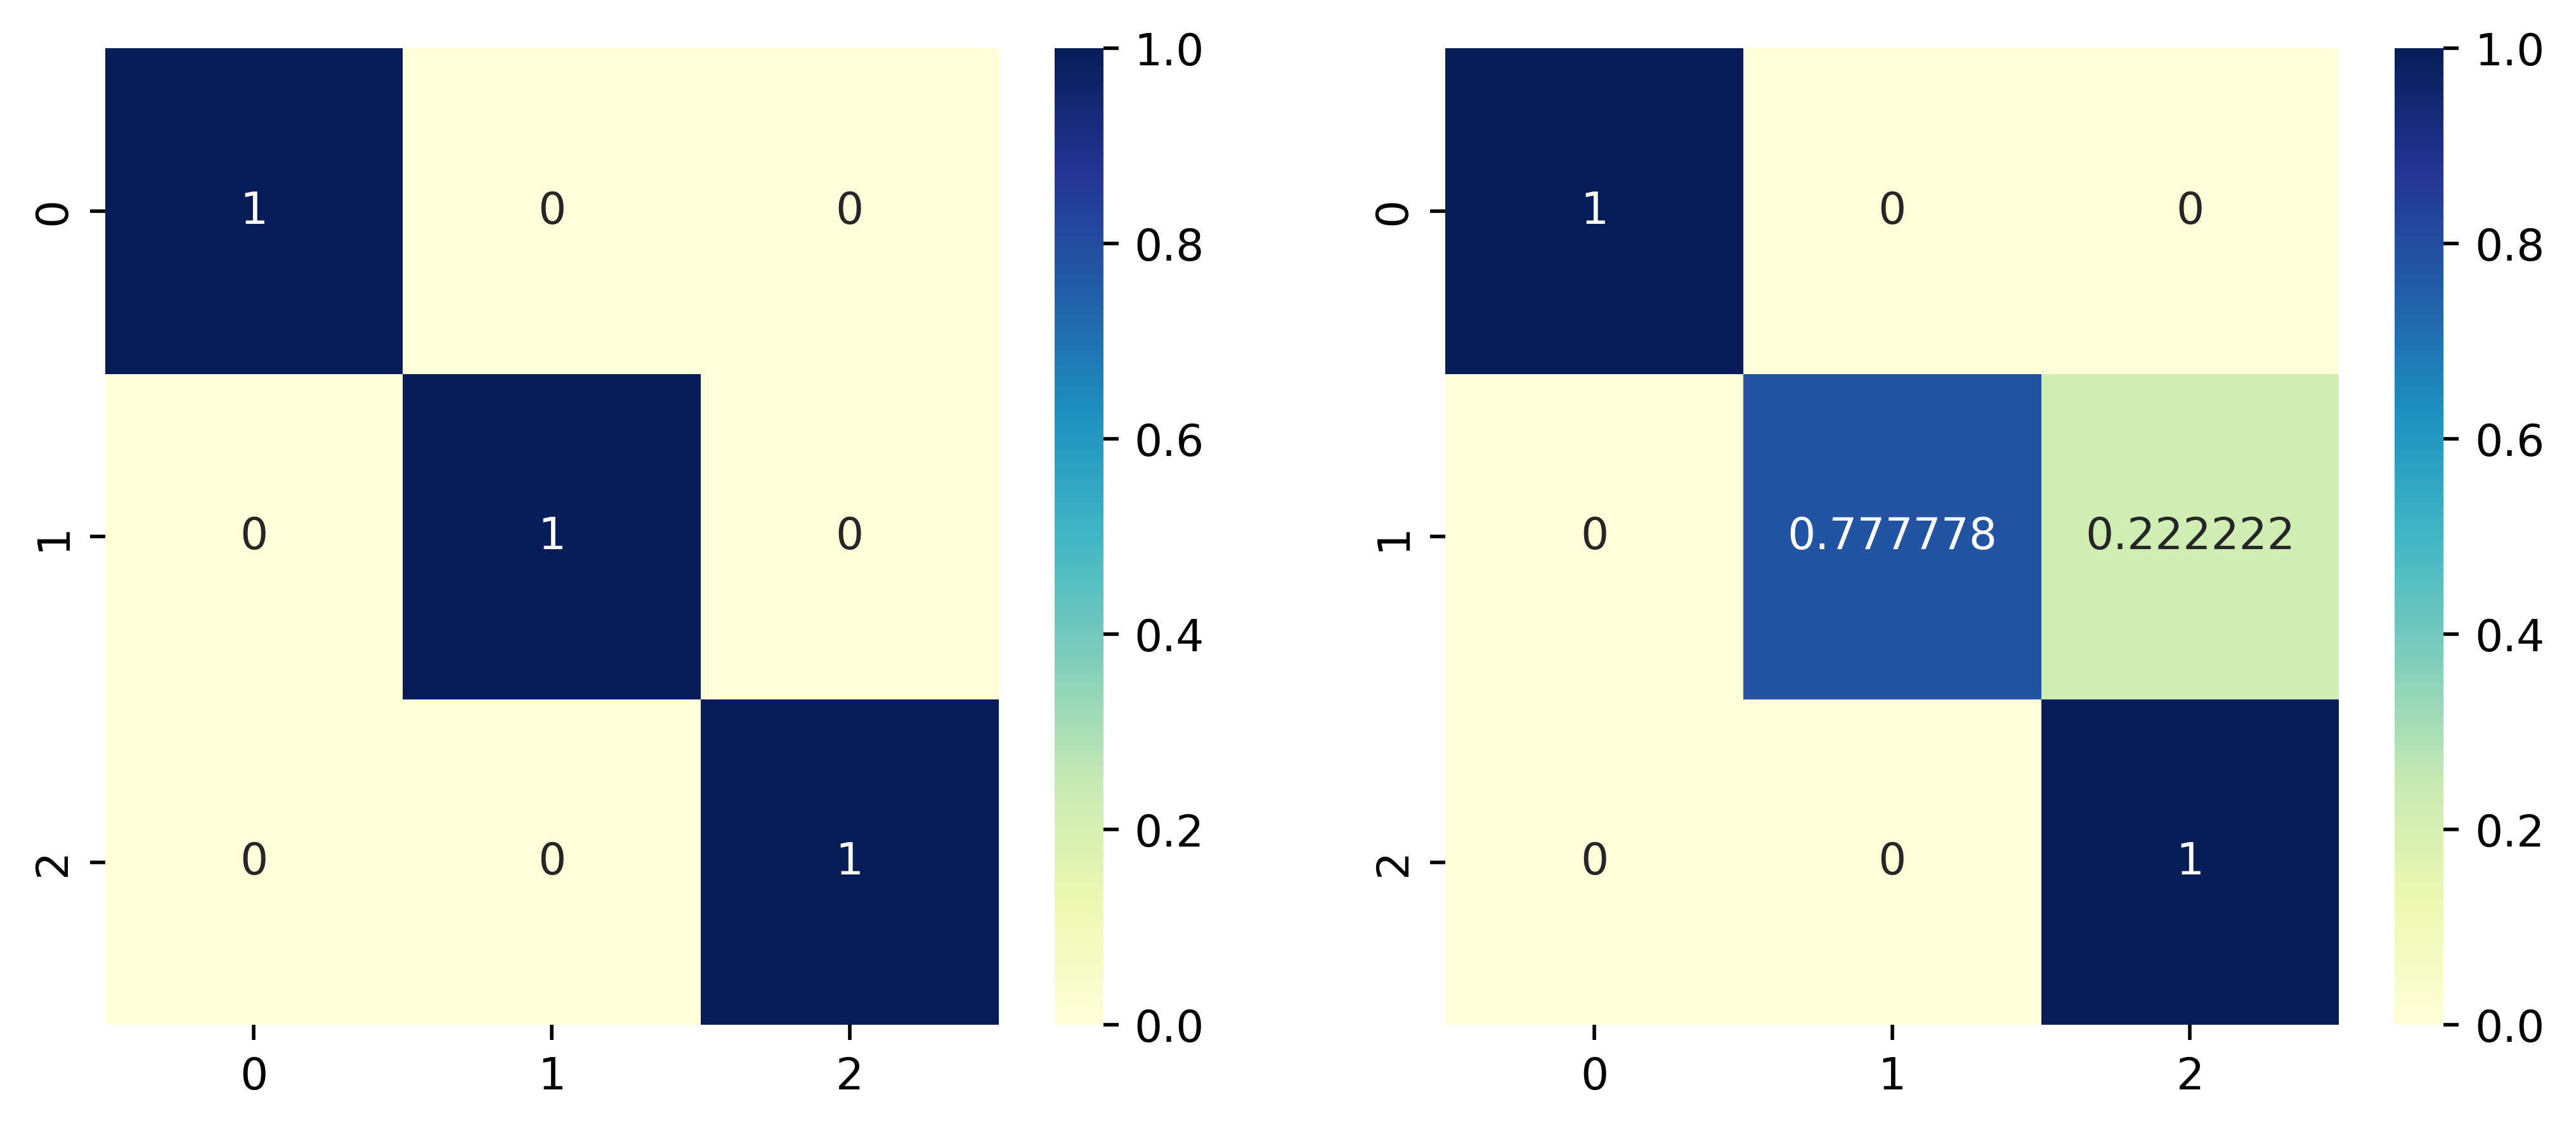

In [37]:
# Generate confusion matrices
_matrices = []
_matrices.append(confusion_matrix(y_test, y_pred_log_reg, normalize="true"))
_matrices.append(confusion_matrix(y_test, y_pred_ridge, normalize="true"))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2, figsize=(10, 4), dpi=500)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

for i, m in enumerate(_matrices):
    # create heatmap
    sns.heatmap(pd.DataFrame(m), ax=ax[i],
                annot=True, cmap="YlGnBu", fmt='g')

# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')


### Plot decision curves

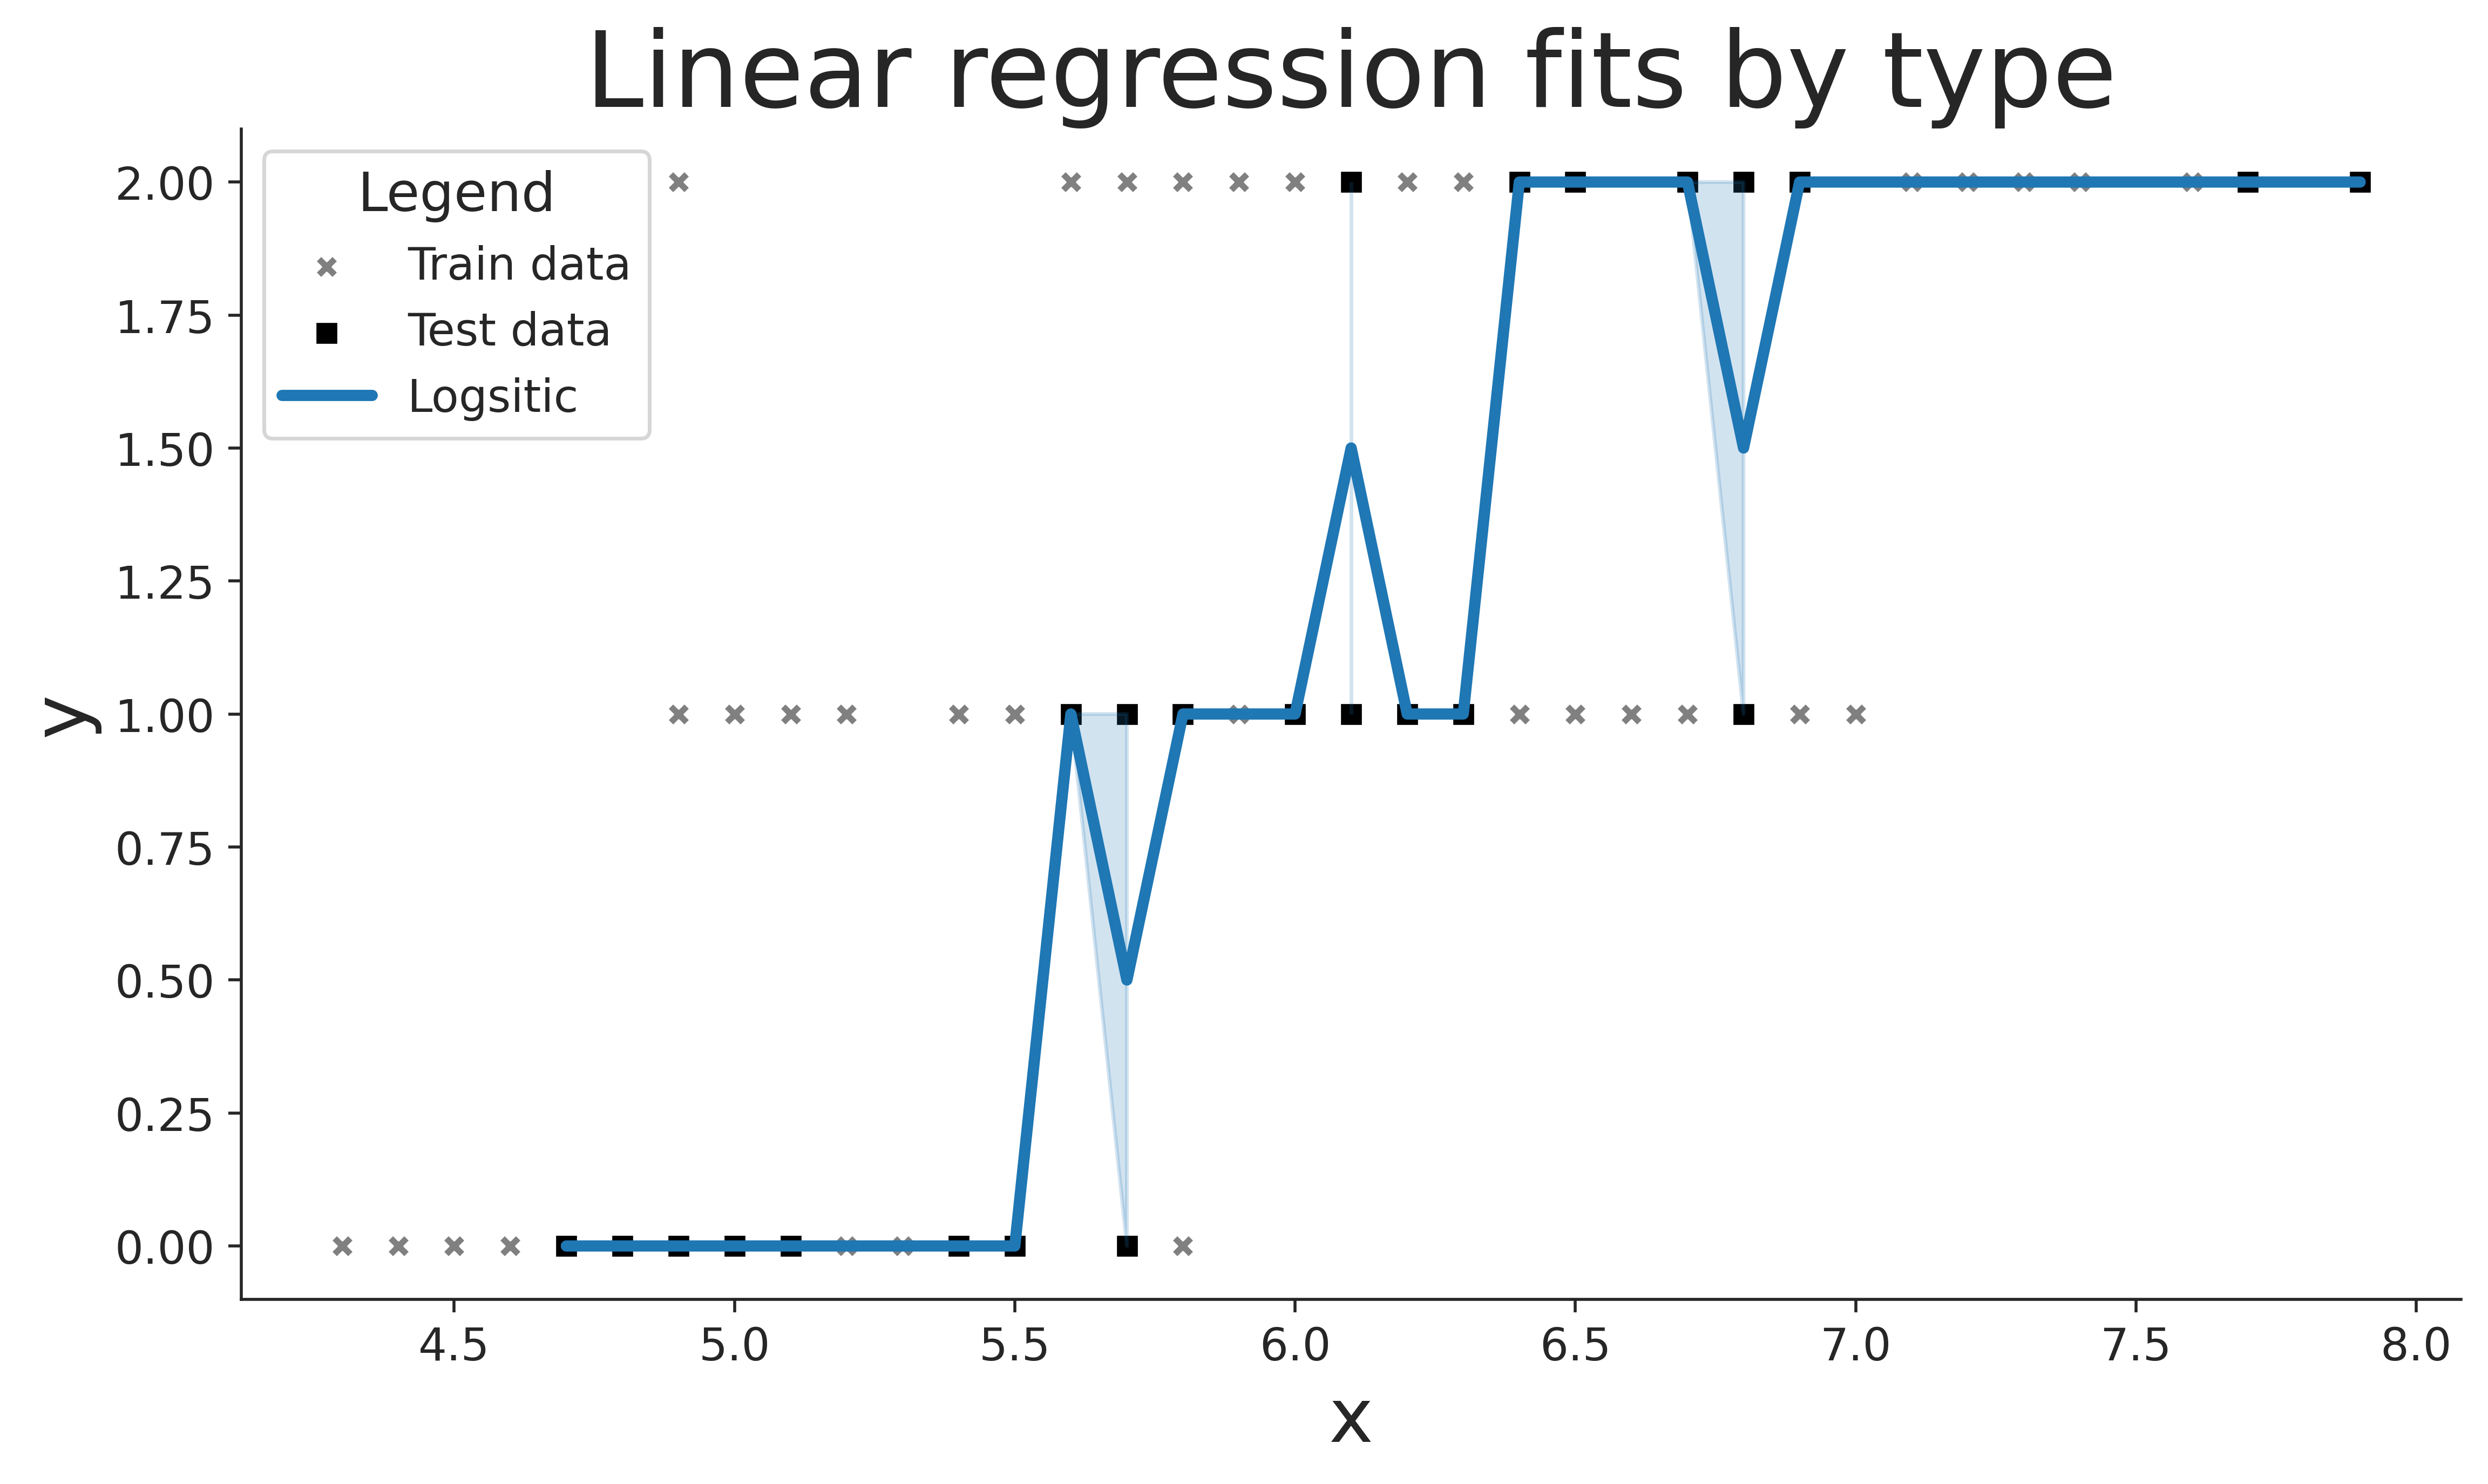

In [6]:
# Initialize plot
with sns.axes_style("ticks"):
    plt.rcParams['legend.title_fontsize'] = 'x-large'
    fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=500)
    plt.tight_layout(pad=5.0)
    plt.title("Linear regression fits by type", fontsize=28)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    _train_data = sns.scatterplot(x=[x[0] for x in X_train],
                    y=y_train, color="grey", marker="X", label="Train data")
    _test_data = sns.scatterplot(x=[x[0] for x in X_test],
                    y=y_test, color="black", marker="s", label="Test data")

    predictions = [y_pred_log_reg]
    _styles = ["solid", "dotted",
               (0, (3, 1, 1, 1, 1, 1)), "dashed", "dashdot", (0, (3, 5, 1, 5))]

    for i, algo in enumerate(["Logsitic"]):
        sns.lineplot(x=[x[0] for x in X_test], y=predictions[i],
                     label=algo, linestyle=_styles[i], linewidth=3)

    algo_legend = ax.legend(title="Legend", fontsize=12, ncol=1)

    ax.set_ylabel('y', fontsize=20)
    ax.set_xlabel('x', fontsize=20)
    sns.despine(offset=0, trim=False, left=False)

### Plot ROC curves

ValueError: x and y must be the same size

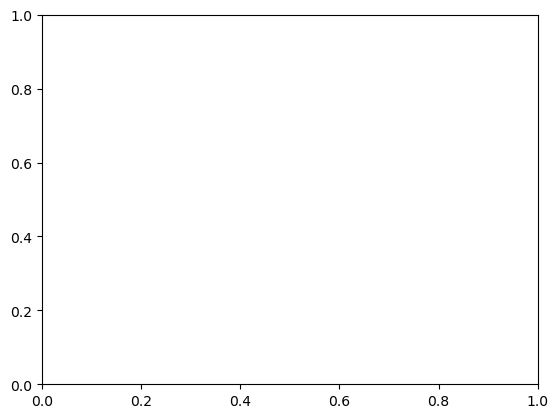

In [7]:
plt.scatter(X_test, y_pred_log_reg)


### Compare R2 of the algorithms

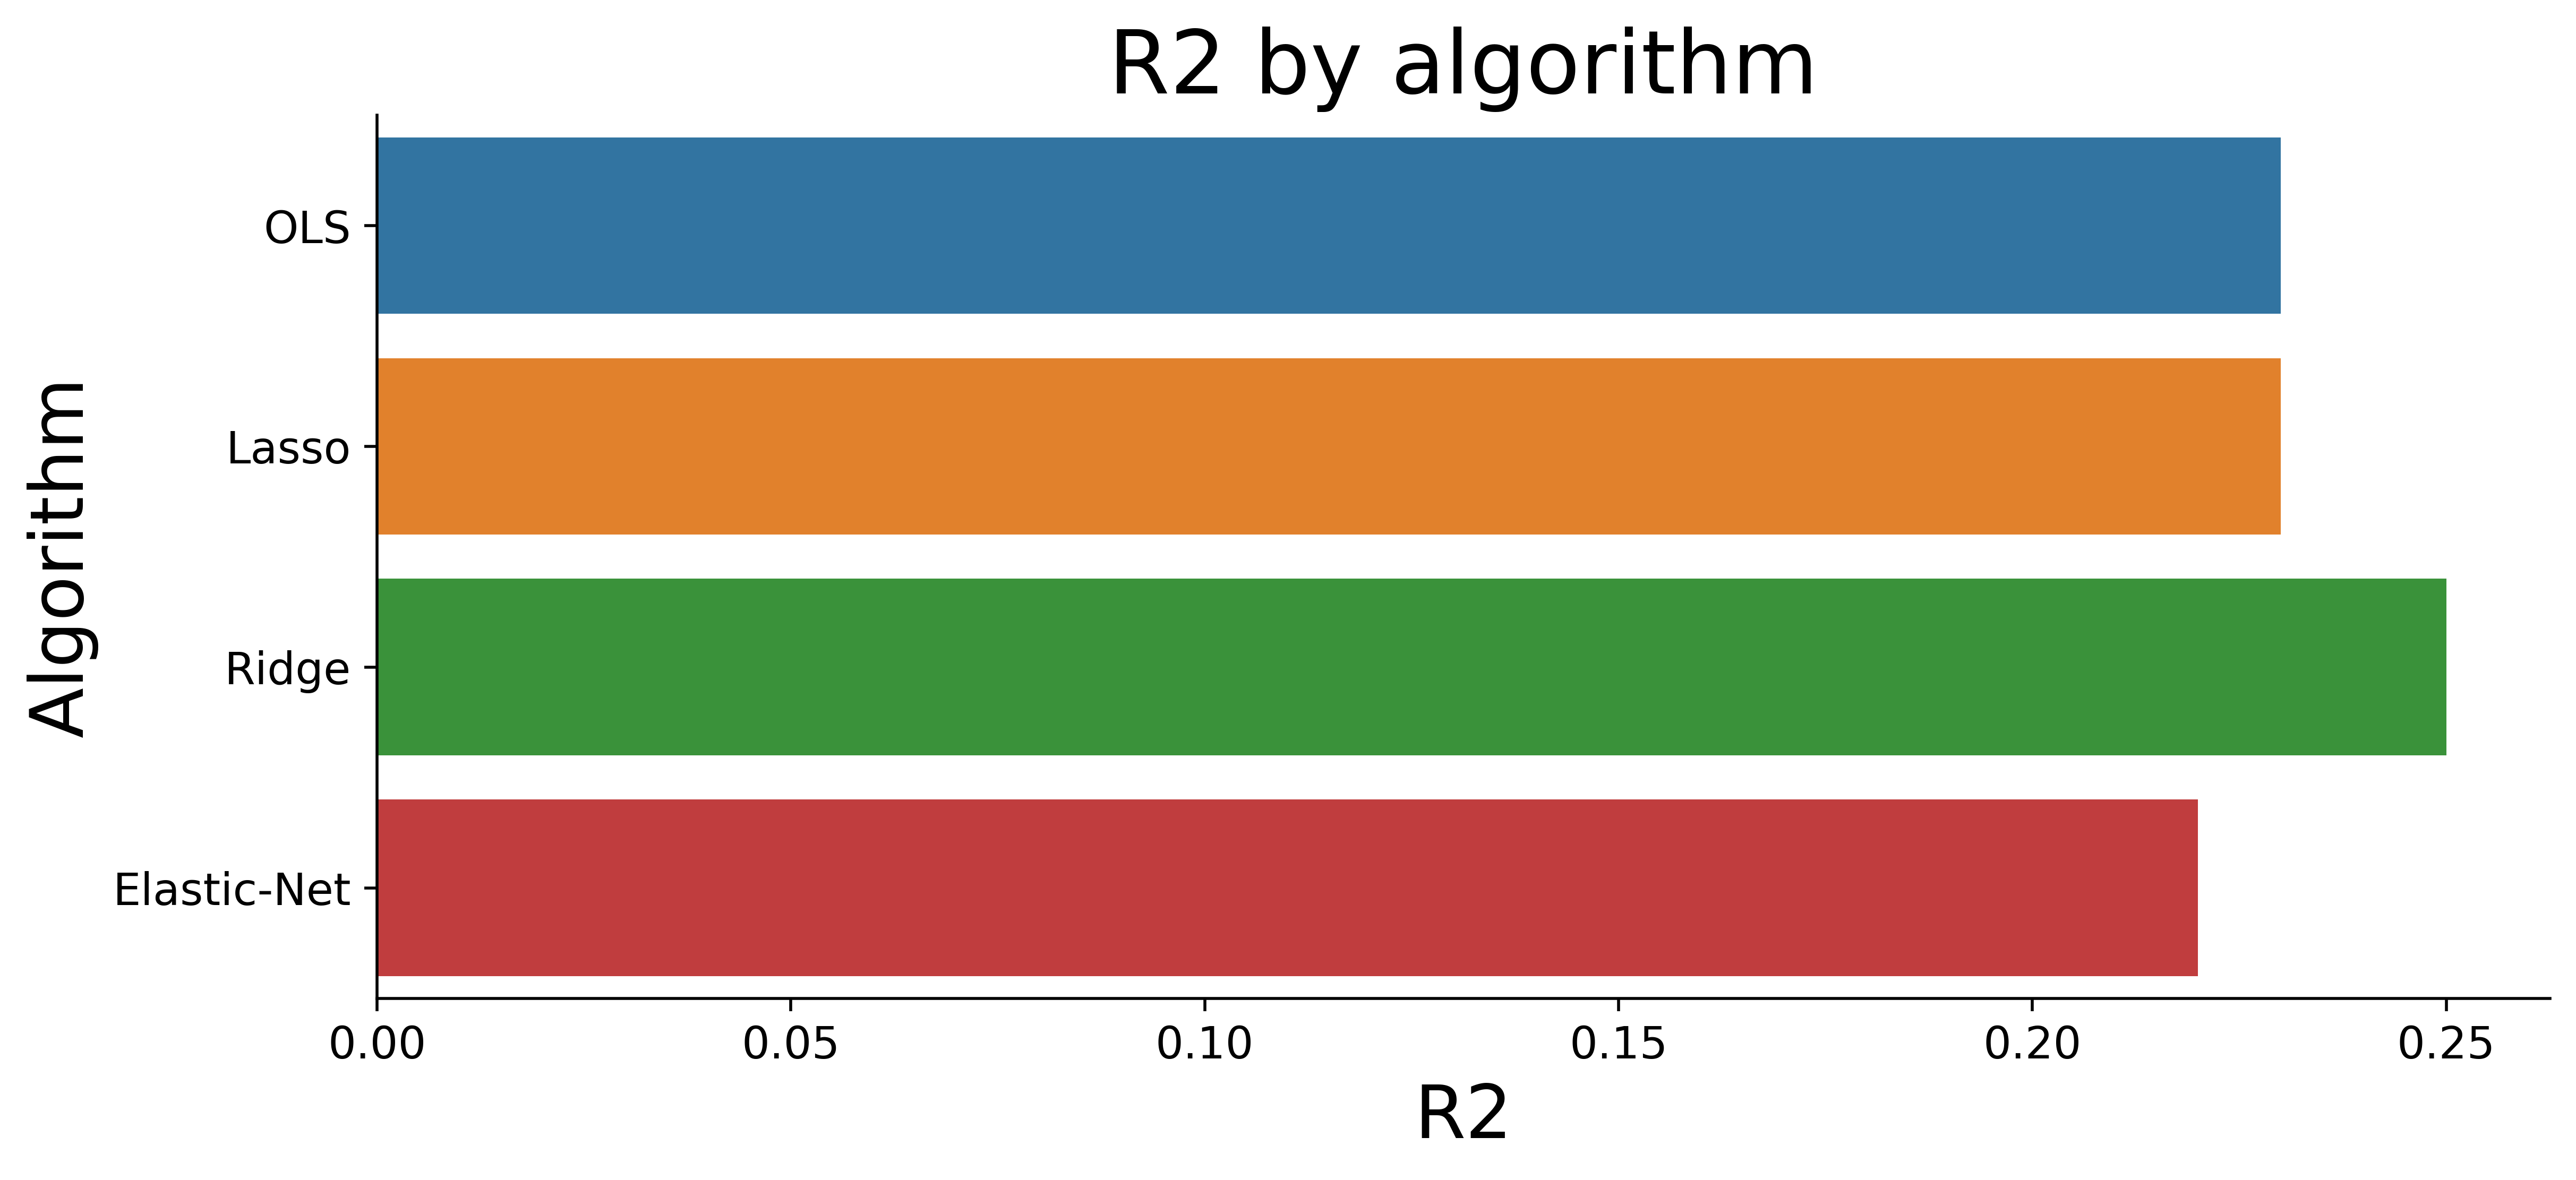

In [ ]:
r2_scores = []

r2_scores.append(
    ["OLS", round(ordinary_least_squares.score(diabetes_X_test, diabetes_y_test), 2)])
r2_scores.append(
    ["Lasso", round(lasso.score(diabetes_X_test, diabetes_y_test), 2)])
r2_scores.append(
    ["Ridge", round(ridge.score(diabetes_X_test, diabetes_y_test), 2)])
r2_scores.append(
    ["Elastic-Net", round(elastic_net.score(diabetes_X_test, diabetes_y_test), 2)])

df = pd.DataFrame(r2_scores, columns=["algo", "r2"])

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
plt.tight_layout(pad=5.0)
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.title("R2 by algorithm", fontsize=24)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

sns.barplot(data=df, x="r2", y="algo", orient="h")

ax.set_xlabel('R2', fontsize=20)
ax.set_ylabel('Algorithm', fontsize=20)

sns.despine(offset=0, trim=False, left=False)
